In [1]:
from colomoto.minibn import *

In [2]:
class MemoryDynamics(UpdateModeDynamics):
    def __init__(self, A, model):
        super().__init__(model)
        self.A = A
    
    def __call__(self, x):
        y = self.model(x)
        D = {a for a in self.A if y[a]-x[a]<0}
        U = tuple((a for a in self.nodes if a not in D))
        z = x.copy()
        for i in U:
            z[i] = y[i]
        yield z
        for k in range(1, len(D)+1):
            for I in itertools.combinations(D, k):
                w = z.copy()
                for i in I:
                    w[i] = y[i]
                yield w

In [3]:
f = BooleanNetwork({
    "x1": "!x3",
    "x2": "x2 & (x1 | x3)",
    "x3": "!x1"
})
f

x1 <- !x3
x2 <- x2&(x1|x3)
x3 <- !x1

# computing graph layout...


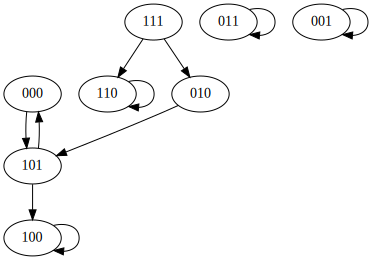

In [4]:
MemoryDynamics({"x1"}, f).dynamics()